## 1.a) Histogram, CCDF of node degrees, avg clustering coeff, overall clustering coeff, max diam and avg diam

In [20]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

data_path = "data/gr_qc_coauthorships.txt"
data = np.loadtxt(data_path, delimiter=" ")
print(f"data.shape {data.shape}")

# Create undirected graph as per the problem description
G = nx.Graph()
G.add_edges_from(data)

# The problem says to work with the largest connected component (4158 nodes)
lcc_nodes = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(lcc_nodes).copy()

print(f"Full network nodes: {G.number_of_nodes()}")
print(f"LCC nodes: {G_lcc.number_of_nodes()}")

data.shape (13428, 2)
Full network nodes: 4158
LCC nodes: 4158


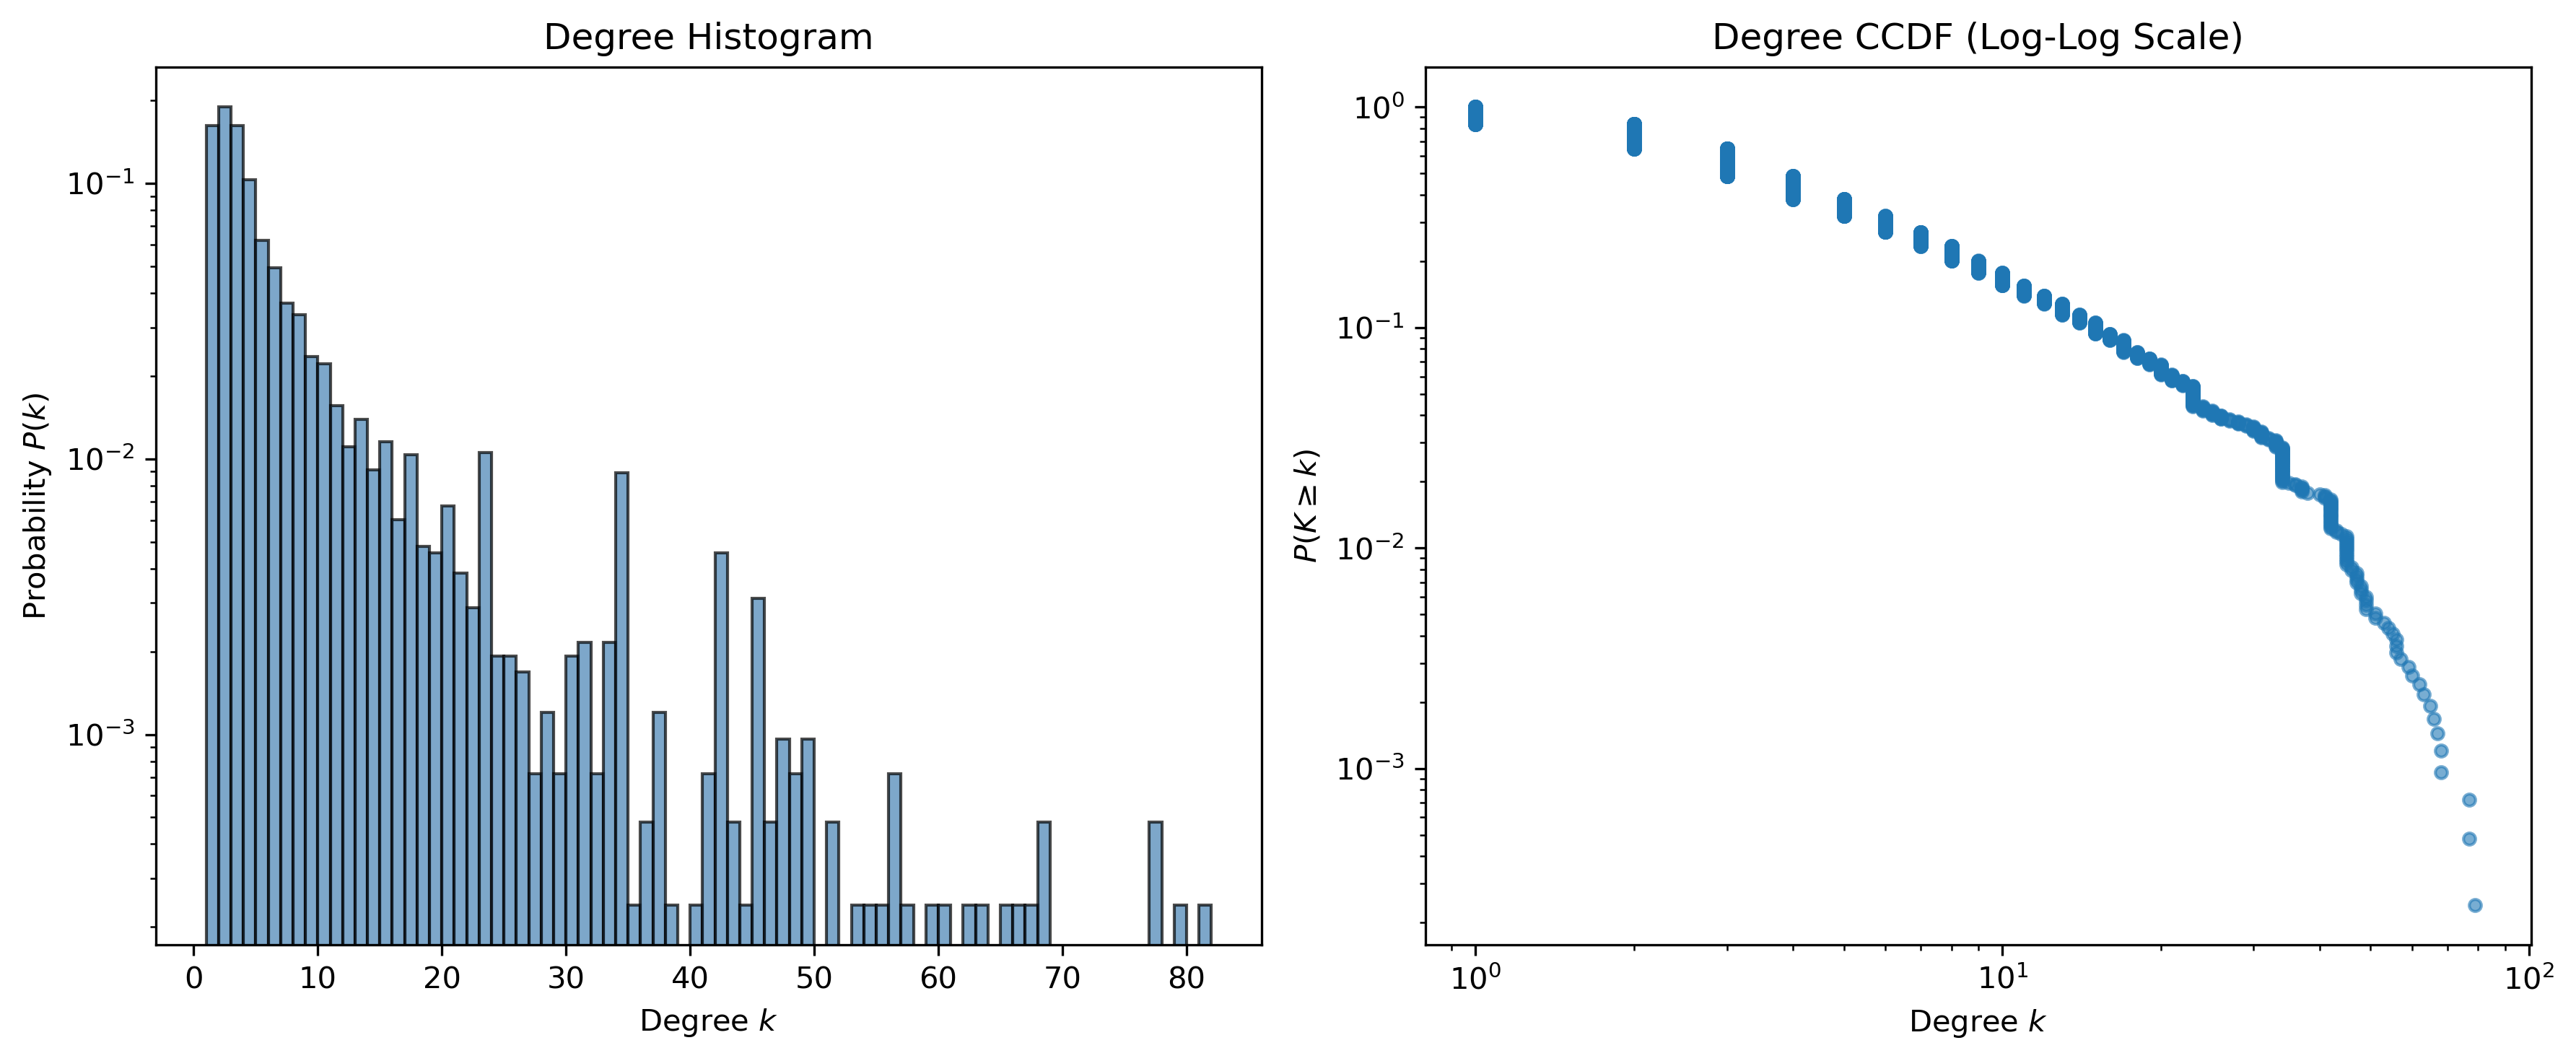

In [21]:
# 1.a) Histogram and CCDF of node degrees
degrees = [d for n, d in G_lcc.degree()]

plt.figure(figsize=(12, 5), dpi=300)

# Histogram
plt.subplot(1, 2, 1)
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 2), density=True, alpha=0.7, color='steelblue', edgecolor='black')
plt.yscale("log")
plt.title("Degree Histogram")
plt.xlabel("Degree $k$")
plt.ylabel("Probability $P(k)$")

# Complementary Cumulative Distribution Function (CCDF)
plt.subplot(1, 2, 2)
sorted_degrees = np.sort(degrees)
# P(K >= k)
ccdf = 1.0 - np.arange(1, len(sorted_degrees) + 1) / len(sorted_degrees)
plt.loglog(sorted_degrees, ccdf, marker='o', linestyle='none', markersize=4, alpha=0.6)
plt.title("Degree CCDF (Log-Log Scale)")
plt.xlabel("Degree $k$")
plt.ylabel("$P(K \geq k)$")

plt.tight_layout()
plt.savefig("latex/figs/1a_degree_hist_and_ccdf.png", bbox_inches='tight')
plt.show()

In [22]:
# 1.a) Clustering coefficients and diameters
avg_clustering = nx.average_clustering(G_lcc)
overall_clustering = nx.transitivity(G_lcc)
max_diameter = nx.diameter(G_lcc)
avg_diameter = nx.average_shortest_path_length(G_lcc)

print(f"Average clustering coefficient: {avg_clustering:.4f}")
print(f"Overall clustering coefficient: {overall_clustering:.4f}")
print(f"Maximal diameter: {max_diameter}")
print(f"Average diameter: {avg_diameter:.4f}")

Average clustering coefficient: 0.5569
Overall clustering coefficient: 0.6289
Maximal diameter: 17
Average diameter: 6.0494


## 1.b) number of triangles

In [23]:
from math import comb

# Calculate number of triangles
# nx.triangles(G) returns a dict where values are number of triangles each node belongs to
# sum(values) / 3 gives total number of unique triangles
num_triangles = sum(nx.triangles(G_lcc).values()) // 3
print(f"Number of triangles T: {num_triangles}")

# Assume T = E[T] for ER graph G(n, p)
# E[T] = comb(n, 3) * p^3 
# (binomial distribution with comb(n, 3) trials and success prob p^3)
n = G_lcc.number_of_nodes()
expected_triangles_coeff = comb(n, 3)
p_er = (num_triangles / expected_triangles_coeff)**(1/3)

print(f"Number of nodes n: {n}")
print(f"Number of possible triangles comb(n, 3): {expected_triangles_coeff:.2e}")
print(f"ER parameter p such that E[T] = T: {p_er:.6f}")

Number of triangles T: 47779
Number of nodes n: 4158
Number of possible triangles comb(n, 3): 1.20e+10
ER parameter p such that E[T] = T: 0.015862


## 1.c) node degree distribution of Erdos-Renyi graph

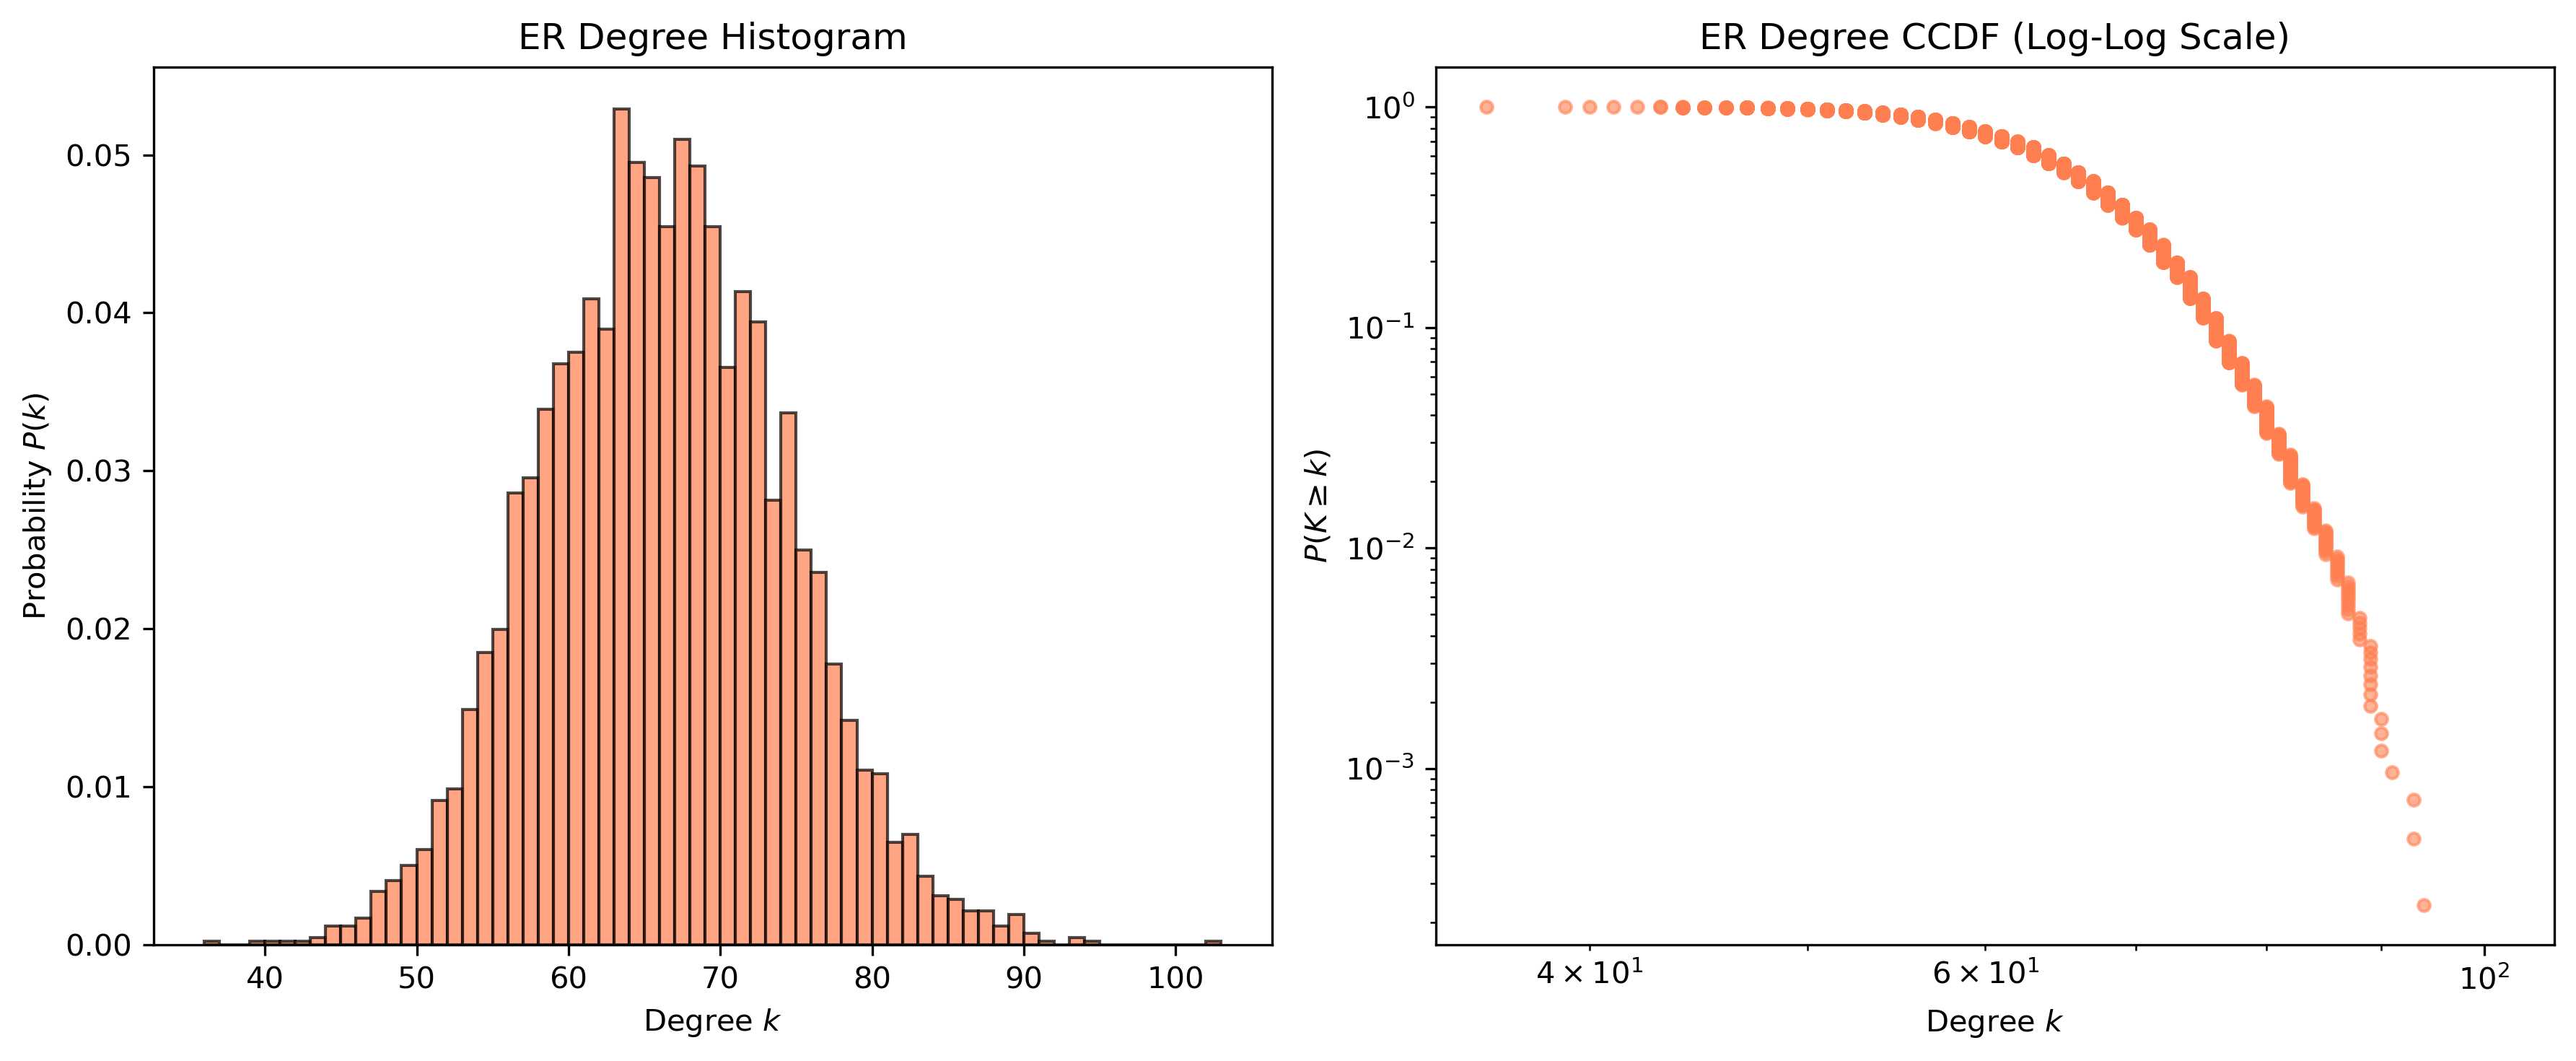

ER Network statistics:
Average degree: 65.7374
Average clustering coefficient: 0.0158
Overall clustering coefficient: 0.0158


In [24]:
# 1.c) Generate ER graph and plot degree distribution
G_er = nx.erdos_renyi_graph(n, p_er)

degrees_er = [d for n, d in G_er.degree()]

plt.figure(figsize=(12, 5), dpi=300)

# Histogram
plt.subplot(1, 2, 1)
plt.hist(degrees_er, bins=range(min(degrees_er), max(degrees_er) + 2), density=True, alpha=0.7, color='coral', edgecolor='black')
plt.title("ER Degree Histogram")
plt.xlabel("Degree $k$")
plt.ylabel("Probability $P(k)$")

# Complementary Cumulative Distribution Function (CCDF)
plt.subplot(1, 2, 2)
sorted_degrees_er = np.sort(degrees_er)
ccdf_er = 1.0 - np.arange(1, len(sorted_degrees_er) + 1) / len(sorted_degrees_er)
plt.loglog(sorted_degrees_er, ccdf_er, marker='o', linestyle='none', markersize=4, alpha=0.6, color='coral')
plt.title("ER Degree CCDF (Log-Log Scale)")
plt.xlabel("Degree $k$")
plt.ylabel("$P(K \geq k)$")

plt.tight_layout()
plt.savefig("latex/figs/1c_er_degree_distribution.png", bbox_inches='tight')
plt.show()

print(f"ER Network statistics:")
print(f"Average degree: {np.mean(degrees_er):.4f}")
print(f"Average clustering coefficient: {nx.average_clustering(G_er):.4f}")
print(f"Overall clustering coefficient: {nx.transitivity(G_er):.4f}")